# WELCOME TO 6.058!

This semester we are going to use jupyter-notebooks. Notebooks are super awesome in that they allow us to focus on graphically displaying data and also allow us to execute code out of order if we want to do something funky.
Consider the segment of code below:

In [12]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

We can execute this segment of code by clicking on it and pressing shift + enter. (if this does not work then talk to me, your software is not installed correctly).

However, for most of the exercises in this course we won't be loading code one segment at a time. So, the first thing I am going to ask you to do in each notebook is to press cell up top and then Run All. This runs all code segments at the same time. Do that now!

In this course we are going to be using python with numpy and scipy in order to create a lot of our software to do signal processing. We are going to access our python knowledge below. If you can't perform any of these exercises please talk to me, we can get you up to speed super fast :) 

Write a function called squarer which uses a for loop in order to square all of the elements in the list of the input signal.

In [2]:
def squarer(inputsignal):
    pass
print(squarer([0,1,2,3,4,5,6,7]))

None


Now do the same thing using a list comprehension

In [3]:
returned_squarer = []
print(returned_squarer)

[]


Create a numpy array of one's with length 18.
Sum all of the elements of the array. np.ones might be useful!

In [13]:
def onesandsum():
    pass
print(onesandsum)

<function onesandsum at 0x7f3daf1ffe18>


There will be a plot of times when we have to plot data. We are going to have two ways of ploting things. 
First in using matplotlib.pyplot.plot https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

You can use this function using plt.plot() followed by plt.show()
Write a function below to do it with the supplies list of data

In [14]:
datalist = [1,2,3,4,5,6,7,8,9]
def plotdata(datalist):
    pass
plotdata(datalist)

We can also using plt.imshow() to display data from a matrix.
Create a function below to display the given matrix

In [19]:
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
def plotmatrix(matrix):
    pass
plotmatrix(matrix)

# Signals and Systems Content

Great, so we have covered some basics on how we are going to use the software. Let's dive into some content.

Today we are going to examine some basic syntax on what a signal and system are.
The first signal we are concerned with is the impulse (or delta) function: This is the plot of a delta function $\delta[n]$ (ignore the x-axis).

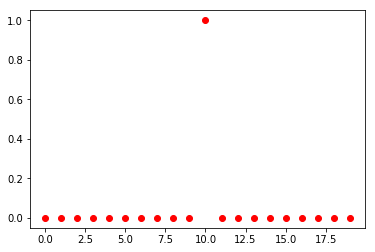

In [20]:
impulse = signal.unit_impulse(20,idx='mid')
plt.plot(impulse,'ro')
plt.show()

Great, we drew a pretty impulse, but what use is this?
First thing first, impulses are VERY useful for being able to model a general discrete signal.
For sample, consider this simple signal:


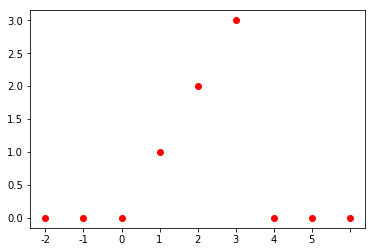

In [5]:
simplesignal = [0,0,0,1,2,3,0,0,0]
plt.figure()
fig, ax = plt.subplots()
plt.plot(simplesignal,'ro')

ax.set_xticklabels(range(-3,len(simplesignal)-3))
plt.show()

For this simple signal we could use the following notation to represent it:
$$\delta[n-1] + 2\delta[n-2] + 3\delta[n-3]$$

As a matter of fact, all discrete signals can be represented of the form:
$$ \text{signal} = \sum_{i=\infty}^{\infty}a_{i}\delta[n-i]$$ where $a_{i}$ is just some scaling factor (coefficient)

We will now have our first example of a homework exercise inside of the notebook.
We have two ways of doing homework in the course, exercises inside of the notebook using software and exercises in the form of psets. Some theory is pset done on pen and paper and the applied work is best done in software. We are going to use both to make sure you understand the material.

## Homework Exercise

Create a plot of the function $$5\delta[n-2] + 2\delta[n-3] + 0.5\delta[n-4] $$

In [21]:
def homework1():
    pass

In addition to being able model discrete signals we will also use delta functions to characterize how systems perform. We will get into this later, but it is useful to keep in mind that this is INCREDIBLY useful.

The next signal we are going to consider is the unit step function, which looks like this:


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


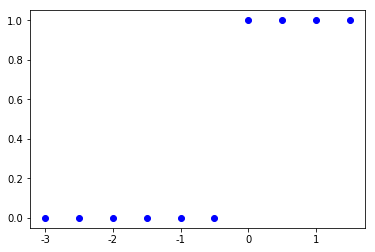

In [29]:
impulse = [1 if x > 0 else 0  for x in range(-5,5)]
print(impulse)
plt.figure()
fig, ax = plt.subplots()
plt.plot(impulse,'bo')
ax.set_xticklabels(range(-4,len(impulse)-4))
plt.show()

YAY! Cool signals! But what can we do with them?

First things first: We can do signal processing! This is the process of taking signals and modifying them in some way. It can be anything really, adding a filter on instagram, bluring an image, removing noise from something while in lab. Most anything in a research setting needs some signal processing.
Second (what we will look at today): Considering how systems interact with signals?

So first, let's look at how we represent systems:

We will be dealing with Linear - Time Invarient Systems. 
Linearity means that given the system f it obeys the following:
$$ f(a) + f(b) = f(a+b) $$

Time Invarience means this:
$$ (x[n] \text{ results in  } y[n]) \text{  implies  } (x[n+k] \text{  result in  } y[n+k]) $$

Why do we care about these? Well they just illustrate two properties of easy to model systems. If we have a system and I put two inputs into it, I hope that the output is the same as of I put the inputs in seperatly and summed the responses. Time invarience says that the system doesn't care when I put the signal in (this is VERY reasonable for almost all systems).

So, we are going to call all Linear and Time-Invarent systems LTI since we will use these A LOT!

So, suppose we have a system of the form:
$$ y[n] = x[n] + 3x[n-1]$$
Create a plot of the impulse response of the system as well as the step response.

## Homework Exercise

In [33]:
def plotImpulseResponse():
    pass
plotImpulseResponse()

In [32]:
def plotStepResponse():
    pass
plotStepResponse()

So, it is very convenient for us to be able to write these systems by hand and solve them, but as they get more and more complex we will start to experience handaches from the computation. Thankfully we can have code take care of it for us. The below snippet of code is finding the impulse response of the system. The one afterwards finds the step response. Verify that your homework solutions match these plots.

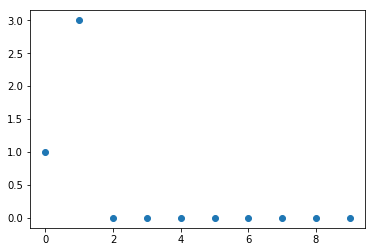

In [7]:
xs = [1,3,0]
ys = [1,0,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dimpulse(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

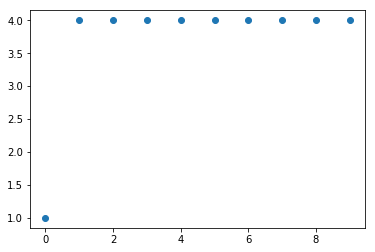

In [34]:
xs = [1,3,0]
ys = [1,0,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dstep(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

AWESOME! So the impulse response looks how we think it should look :D
Can you use a similar piece of a code to make the step response for this system:
$$y[n] - y[n-1] = x[n] + x[n-1]$$
## Homework Exercise

In [35]:
def stepresponse2():
    pass
stepresponse2()

## Homework Exercise
Why does this output settle at 4? Think about what the interaction between $y[n]$ and $y[n-1]$ is.

WRITE ANSWER HERE!!!!!!!

Consider the below system. You have a slider for tweaking r in the input.
The system looks like this:
$ y[n] - y[n-1] = x[n] + rx[n-1]$.

In [40]:
def impulseresponse2(r):
    xs = [1,r,0]
    ys = [1,-1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dimpulse(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(impulseresponse2, r=(-1.0,1.0));

A Jupyter Widget

We must also look at a step response and consider what it looks like.
Let's look at the step response of the following system:

In [41]:
def stepresponse3(r):
    xs = [1,r,0]
    ys = [1,-1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(stepresponse3, r=(-2.0,2.0));

A Jupyter Widget

Cool! We now have some analysis tools that we can use. 
Let's do some modeling in order to use them on real systems.
First part, we are going to consider a heating system.
Now, heating systems often have some kind of thermal mass, $M$ and some loss $R$
We are going to model the system using the equation:
$$T_{Heater}[n] =  T_{Room}[n] + R \times M \times \frac{d T_{Room}[n]}{dt}$$
To figure out where this equation comes from, remember from thermo that Heat in = Heat out + Heat stored.

Finish the below function to find the impulse and step function of this model using $$R=1,M=5$$. What is a derivative in discrete time (if unsure look at the PSET)?

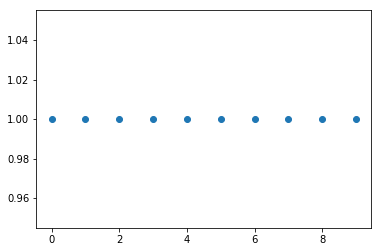

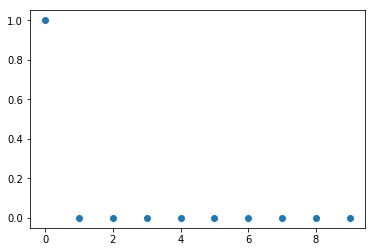

In [42]:
def temperaturemodel(R=1,M=5):
    xs = [1]
    ys = [1]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    iout,iyout = signal.dimpulse(sys)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    plt.figure()
    plt.plot(iout[0:10],iyout[0][0:10],'o')
    plt.show()
    
temperaturemodel()

## Homework Exercise

Solve the differential equation for continuous time. Does this match what the differential equation tells you for continuous time step and impulse response? Write the continious time impulse and step response equations here $$\text{impulse response equation}$$
$$\text{step response equation}$$

## Homework Exercise

Create a plot of the impulse and step responses you calculated by hand above

In [43]:
def temperatureImpulsePlot():
    pass

temperatureImpulsePlot()

In [ ]:
def temperta